In [ ]:
!pip install colormath

  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39407 sha256=d696139a6b6b9fbe7608c8a20bba3e085440dbd9cc4c68335b4cb612173b42ad
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Figure 2 abs images

In [ ]:
p1 = pd.read_csv('/content/P1.csv')
p2 = pd.read_csv('/content/P2.csv')
p3 = pd.read_csv('/content/P3.csv')
p4 = pd.read_csv('/content/P4.csv')

In [ ]:
def setup_subplot(x, y, color, polymer_name):
    fig, ax = plt.subplots(figsize=(4,3))
    plt.rcParams['xtick.labelsize'] = 15
    ax.plot(x, y, color=color, label= polymer_name, linewidth=3)#, s=100, edgecolor='black',# marker=marker,
              # label= polymer_name)
    # ax.scatter(x, y, s=5, edgecolor='black', zorder=2)# marker=marker,

    # ax.set_aspect('equal')#, adjustable='box')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='both', which='both', width=2)
    ax.tick_params(axis='x', colors='black', labelsize=14)
    ax.tick_params(axis='y', colors='black', labelsize=14)
    ax.tick_params(axis='both', which='major', length=14)
    ax.tick_params(axis='both', which='minor', length=8, color='black')
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True, direction='in')
    # ax.set_xlabel('Wavelength (nm)', fontsize=16)
    # ax.set_ylabel('Absorbance', fontsize=16)
    ax.legend(prop={'size': 16})
    plt.savefig(f"{polymer_name}_abs.svg")

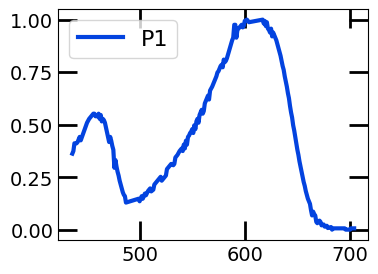

In [ ]:
setup_subplot(p1['Wavelength (nm)'], p1['Absorbance'],color='#0343df', polymer_name='P1')

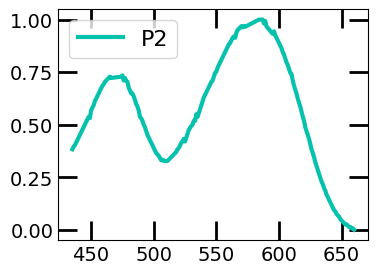

In [ ]:
setup_subplot(p2['Wavelength (nm)'], p2['Absorbance'],color='#06c2ac', polymer_name='P2')

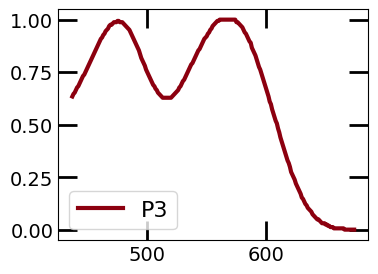

In [ ]:
setup_subplot(p3['Wavelength (nm)'], p3['Absorbance'],color='#8c000f', polymer_name='P3')

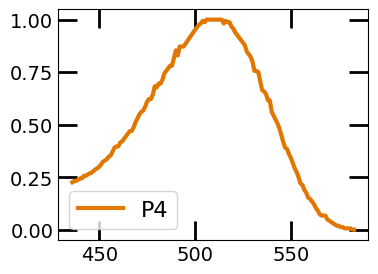

In [ ]:
setup_subplot(p4['Wavelength (nm)'], p4['Absorbance'],color='#e17701', polymer_name='P4')

# Statistical analysis

In [ ]:
data_in_house = pd.read_csv('/content/ecps_in_house.csv')
data_literature = pd.read_csv('/content/ecps_literature_only_rgb.csv', encoding='latin1')
data_sdl =  pd.read_csv('closeloop_all_past_experiments_rgb.csv')

dot_colors_in_house = [eval(t) for t in data_in_house['rgb_color'].values]
dot_colors_literature = [eval(t) for t in data_literature['rgb_color'].values]
dot_colors_sdl = [eval(t) for t in data_sdl['rgb_color'].values]

# Strip line with colors (Figure 1)

In [ ]:
from skimage import color
import numpy as np

def rgb_to_lab(rgb_arrays):

    rgb_arrays_np = np.array(rgb_arrays)
    rgb_image = rgb_arrays_np.reshape((1, rgb_arrays_np.shape[0], 3))

    # Convert from RGB to L*a*b*
    lab_image = color.rgb2lab(rgb_image)

    # Reshape the result back to a 2D array of colors
    lab_colors = lab_image.reshape((rgb_arrays_np.shape[0], 3))

    return lab_colors

In [ ]:
"""
The functions in this module are used for comparing two LabColor objects
using various Delta E formulas.
"""

import numpy

from colormath import color_diff_matrix


def _get_lab_color1_vector(color):
    """
    Converts an LabColor into a NumPy vector.

    :param LabColor color:
    :rtype: numpy.ndarray
    """
    if not color.__class__.__name__ == 'LabColor':
        raise ValueError(
            "Delta E functions can only be used with two LabColor objects.")
    return numpy.array([color.lab_l, color.lab_a, color.lab_b])


def _get_lab_color2_matrix(color):
    """
    Converts an LabColor into a NumPy matrix.

    :param LabColor color:
    :rtype: numpy.ndarray
    """
    if not color.__class__.__name__ == 'LabColor':
        raise ValueError(
            "Delta E functions can only be used with two LabColor objects.")
    return numpy.array([(color.lab_l, color.lab_a, color.lab_b)])



# noinspection PyPep8Naming
def delta_e_cie2000(color1, color2, Kl=1, Kc=1, Kh=1):
    """
    Calculates the Delta E (CIE2000) of two colors.
    """
    color1_vector = _get_lab_color1_vector(color1)
    color2_matrix = _get_lab_color2_matrix(color2)
    delta_e = color_diff_matrix.delta_e_cie2000(
        color1_vector, color2_matrix, Kl=Kl, Kc=Kc, Kh=Kh)[0]
    return delta_e.item()

In [ ]:
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

def create_full_color_gradient_lab(n_samples):
    """
    Create a list of L*a*b* values that represents a full color gradient.

    Parameters:
    - n_samples: The number of gradient samples.

    Returns:
    - A list of L*a*b* values covering the full color range.
    """
    # Generate hue values in HSL space
    H = np.linspace(0, 1, n_samples)
    S = np.ones(n_samples) * 0.5  # Moderate saturation
    L = np.ones(n_samples) * 0.8  # Mid lightness

    # Convert HSL to RGB, then RGB to LAB
    hsv_values = np.stack((H, S, L), axis=-1)
    rgb_values = hsv_to_rgb(hsv_values)
    # print('rgb_values', rgb_values)
    lab_values = rgb_to_lab(rgb_values)
    # print('lab_values', lab_values)
    return lab_values

# # Generate L*a*b* values for the strip that covers the full color gradient
n_samples = 256  # Number of samples in the gradient
strip_lab_values = create_full_color_gradient_lab(n_samples)

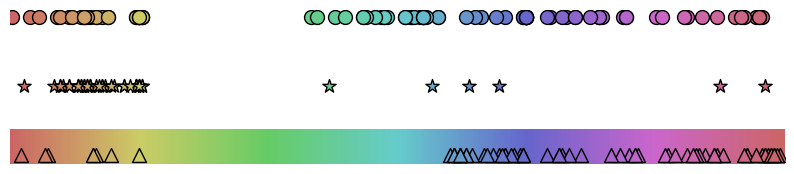

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, to_rgb
from skimage.color import lab2rgb
# from colormath.color_diff import delta_e_cie2000
from colormath.color_objects import LabColor


def get_lab_distance(color1, color2):
    # print(LabColor(*color1), LabColor(*color2))
    """Color comparison based on the delta-E value: https://python-colormath.readthedocs.io/en/latest/delta_e.html"""
    return delta_e_cie2000(LabColor(*color1), LabColor(*color2))

# Function to find the position on the strip for each dot color
def match_colors_to_strip(dot_lab_values, strip_lab_values):
    positions = []
    for dot_lab in dot_lab_values:
        # print(dot_lab)
        min_delta_e = float('inf')
        min_index = 0
        for i, strip_lab in enumerate(strip_lab_values):
            delta_e = get_lab_distance(dot_lab, strip_lab)
            if delta_e < min_delta_e:
                min_delta_e = delta_e
                min_index = i
        positions.append(min_index)
    return positions

# Function to plot the strip and the dots
def plot_color_strip_with_dots(dot_lab_values, dot_lab_values_in_house,dot_lab_values_sdl, strip_lab_values, strip_height=10, dot_size=100):
    # Generate a continuous gradient for the strip
    strip_gradient = np.linspace(0, 1, 256)
    strip_image = np.vstack((strip_gradient, strip_gradient))

    strip_rgb_values = lab2rgb(np.array([strip_lab_values]))[0]
    # print('strip_rgb_values', strip_rgb_values)
    strip_cmap = LinearSegmentedColormap.from_list('strip_cmap', strip_rgb_values, N=256)

    # Plot the strip
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.imshow(strip_image, aspect='auto', cmap=strip_cmap)

    # Calculate positions for the dots on the strip
    dot_positions = match_colors_to_strip(dot_lab_values, strip_lab_values)
    dot_positions2 = match_colors_to_strip(dot_lab_values_in_house, strip_lab_values)
    dot_positions3 = match_colors_to_strip(dot_lab_values_sdl, strip_lab_values)

    for position in dot_positions:
      dot_rgb = lab2rgb(np.array([[strip_lab_values[position]]]))[0][0]
      ax.scatter(position, strip_height // 8-8, s=dot_size, c=[dot_rgb], edgecolors='black', marker = "o")

    for pos in dot_positions2:
      dot_rgb = lab2rgb(np.array([[strip_lab_values[pos]]]))[0][0]
      ax.scatter(pos, (strip_height // 8 ), s=dot_size, c=[dot_rgb], edgecolors='black', marker = "^")

    for pos_sdl in dot_positions3:
      dot_rgb = lab2rgb(np.array([[strip_lab_values[pos_sdl]]]))[0][0]
      ax.scatter(pos_sdl, (strip_height // 8 -4 ), s=dot_size, c=[dot_rgb], edgecolors='black', marker = "*")

    ax.axis('off')
    plt.savefig('color_wheel.svg')
    plt.show()

#'L* (Colored State)'], in_house_data['a* (Colored State)'], in_house_data['b*(Colored State)']))
dot_lab_values_literature=  list(zip(data_literature ['L* (Colored State)'], data_literature ['a* (Colored State)'], data_literature ['b*(Colored State)']))
dot_lab_values_literature =[list(i) for i in dot_lab_values_literature]

dot_lab_values_in_house=  list(zip(data_in_house['L'], data_in_house['a'], data_in_house['b']))
dot_lab_values_in_house =[list(i) for i in dot_lab_values_in_house]

dot_lab_values_sdl=  list(zip(data_sdl['L_exp'], data_sdl['a_exp'], data_sdl['b_exp']))
dot_lab_values_sdl =[list(i) for i in dot_lab_values_sdl]

# Now plot the strip with the dots
plot_color_strip_with_dots(dot_lab_values_literature, dot_lab_values_in_house,dot_lab_values_sdl, strip_lab_values)


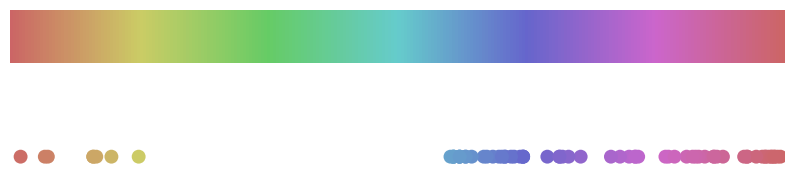

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, to_rgb
from skimage.color import lab2rgb
# from colormath.color_diff import delta_e_cie2000
from colormath.color_objects import LabColor

# Function to calculate Delta E (CIE76) for two L*a*b* colors
def delta_e_cie76(color1, color2):
    return np.sqrt(np.sum((np.array(color1) - np.array(color2)) ** 2))

def get_lab_distance(color1, color2):
    # print(LabColor(*color1), LabColor(*color2))
    """Color comparison based on the delta-E value: https://python-colormath.readthedocs.io/en/latest/delta_e.html"""
    return delta_e_cie2000(LabColor(*color1), LabColor(*color2))

# Function to find the position on the strip for each dot color
def match_colors_to_strip(dot_lab_values, strip_lab_values):
    positions = []
    for dot_lab in dot_lab_values:
        # print(dot_lab)
        min_delta_e = float('inf')
        min_index = 0
        for i, strip_lab in enumerate(strip_lab_values):
            delta_e = get_lab_distance(dot_lab, strip_lab)
            if delta_e < min_delta_e:
                min_delta_e = delta_e
                min_index = i
        positions.append(min_index)
    return positions

# Function to plot the strip and the dots
def plot_color_strip_with_dots(dot_lab_values, strip_lab_values, strip_height=10, dot_size=100):
    # Generate a continuous gradient for the strip
    strip_gradient = np.linspace(0, 1, 256)
    strip_image = np.vstack((strip_gradient, strip_gradient))

    strip_rgb_values = lab2rgb(np.array([strip_lab_values]))[0]
    strip_cmap = LinearSegmentedColormap.from_list('strip_cmap', strip_rgb_values, N=256)

    # Plot the strip
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.imshow(strip_image, aspect='auto', cmap=strip_cmap)

    # Calculate positions for the dots on the strip
    dot_positions = match_colors_to_strip(dot_lab_values, strip_lab_values)

    # Plot each dot at the matched position on the strip
    for position in dot_positions:
      try:
        dot_rgb = lab2rgb(np.array([[strip_lab_values[position]]]))[0][0]
        ax.scatter(position, strip_height // 2, s=dot_size, c=[dot_rgb], edgecolors='none')
      except IndexError:
        print(position)
        pass
    # Hide the axis
    ax.axis('off')
    plt.show()


dot_lab_values =  list(zip(data['L'], data['a'], data['b']))
dot_lab_values =[list(i) for i in dot_lab_values]

# Now plot the strip with the dots
plot_color_strip_with_dots(dot_lab_values, strip_lab_values)
